In [1]:
# import required libraries

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten, Reshape
from tensorflow.keras import models
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from IPython import display 
import numpy as np

%matplotlib inline

2024-08-05 10:34:28.114453: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


image shape: (28, 28) and random pixel value is 0.09411764705882353


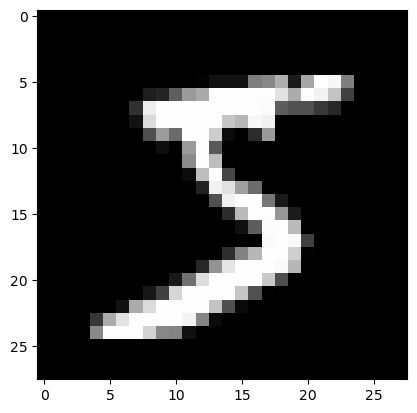

In [2]:
### edTest(test_normalize) ###
# First we load in the MNIST dataset.

# Do not fill in the blank space
(x_train, _), (x_test, _) = mnist.load_data()


# We will only take 4000 data points from the original dataset to demonstrate the autoencoders
sample_size = 4000 
x_train = x_train[:sample_size]
x_test = x_test[:sample_size]

# We normalize the pixel data (i.e divide by 255)

x_train = x_train/255
x_test = x_test/255

# We print image dimensions to confirm 
print(f'image shape: {x_train[0].shape} and random pixel value is {x_train[0][20][10]}')

# We also plot example image from x_train
plt.imshow(x_train[0], cmap = "gray")
plt.show()

In [3]:
# Now we create the encoder model to take compress each image down to a lower dimensional latent space.

# pick a size for the latent dimension like 32
latent_size = 2

# Note how sequential models can also be passed a list of layers

# This can be more concise than using add()
model_1 = models.Sequential(name='Encoder')

# add a flatten layer to convert image of size (28,28) to 784
model_1.add(Flatten())

# add a dense layer with 128 neurons
model_1.add(Dense(128, activation='relu'))

# add another dense layer with 64 neurons
model_1.add(Dense(64, activation='relu'))

# Finally add the last dense layer with latent_size number of neurons
model_1.add(Dense(latent_size, activation='relu'))

# Take a quick look at the model summary
model_1.summary()

Model: "Encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Now we create the decoder model to take compress each image down to a lower dimensional latent space.
model_2 = models.Sequential(name='Decoder')

# add a dense layer with 64 neurons
model_2.add(Dense(64, activation='relu'))

# add a dense layer with 128 neurons
model_2.add(Dense(128, activation='relu'))

# add a dense layer with 784 neurons and especially choose an appropriate activation function
model_2.add(Dense(784, activation='relu'))

# finally reshape it back to size 28,28
model_2.add(Reshape((28,28)))

# Take a quick look at the model summary
model_2.summary()

Model: "Decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
# To build autoencoders, we will use the keras 'functional api'
# read more here -> https://www.tensorflow.org/guide/keras/functional

# define an input of the dimension of the image
img = Input(shape=(28,28))

# Use the 'encoder' i.e model_1 from above to get a variable `latent_vector`
latent_vector = model_1(img)

# Use the 'decoder' i.e model_2 from above to get the output variable
output = model_2(latent_vector)


# using functional api to define autoencoder model
autoencoder = Model(inputs = img, outputs = output)

# choose an appropriate loss function for 'reconstruction error'
autoencoder.compile(optimizer='adam', loss='mse')

# Take a quick look at the model summary
autoencoder.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoder (Sequential)            │ (None, 2)              │       108,866 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoder (Sequential)            │ (None, 28, 28)         │       109,648 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,514 (853.57 KB)

 Trainable params: 218,514 (853.57 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0885 - val_loss: 0.0786
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0824 - val_loss: 0.0780
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0817 - val_loss: 0.0747
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0775 - val_loss: 0.0718
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0728 - val_loss: 0.0633
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0629 - val_loss: 0.0609
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0614 - val_loss: 0.0585
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0590 - val_loss: 0.0568
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0572 - v

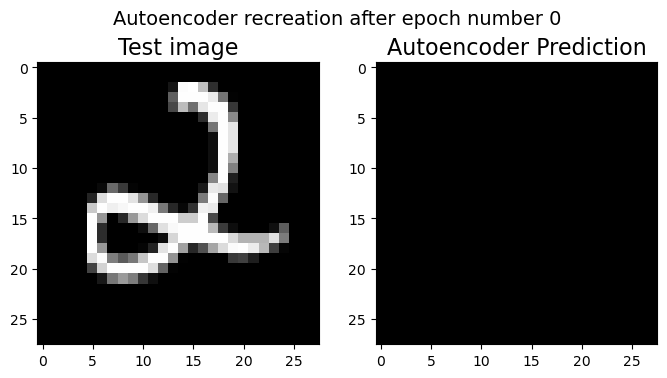

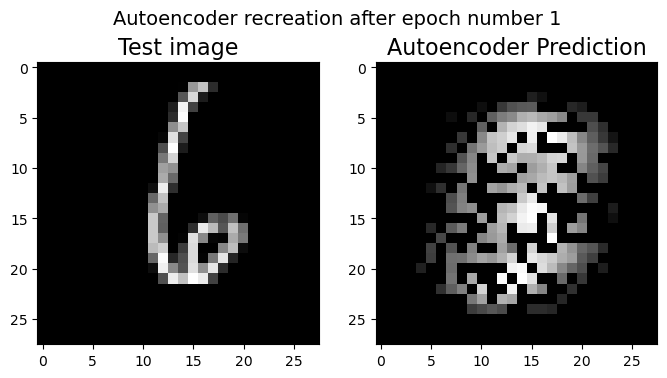

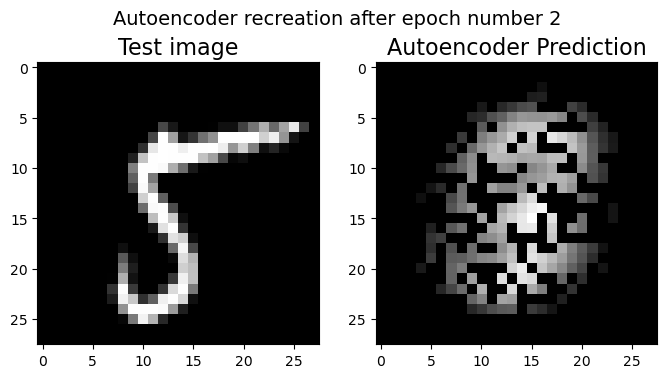

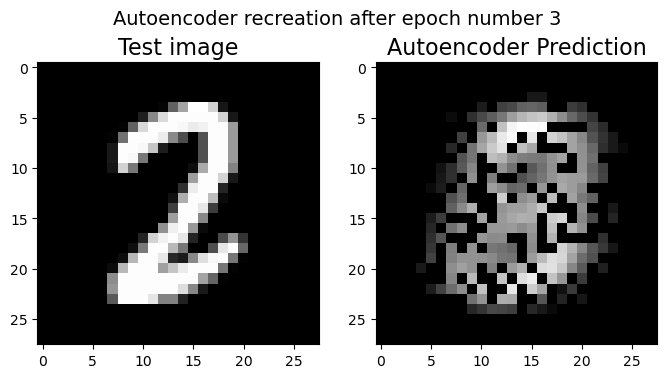

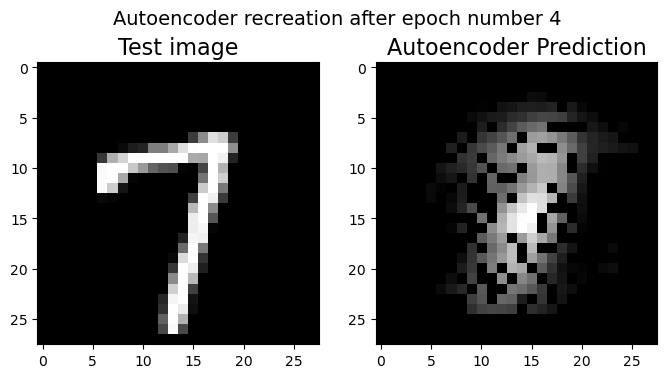

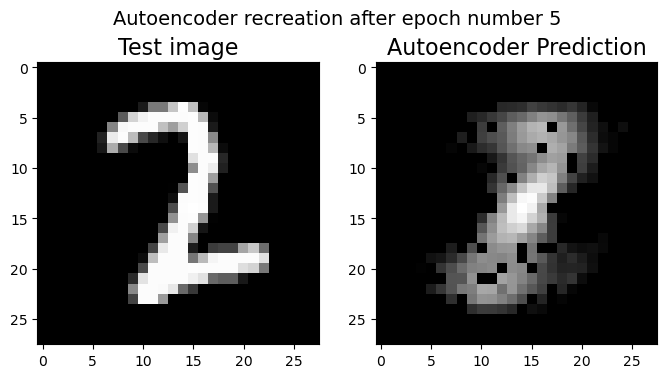

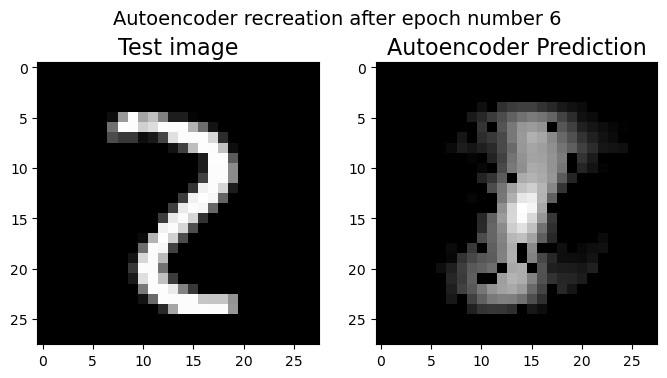

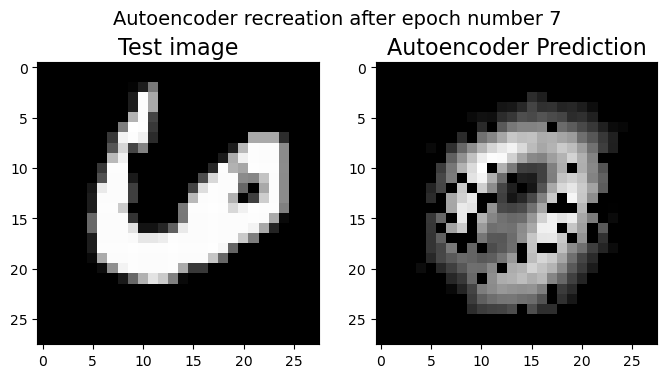

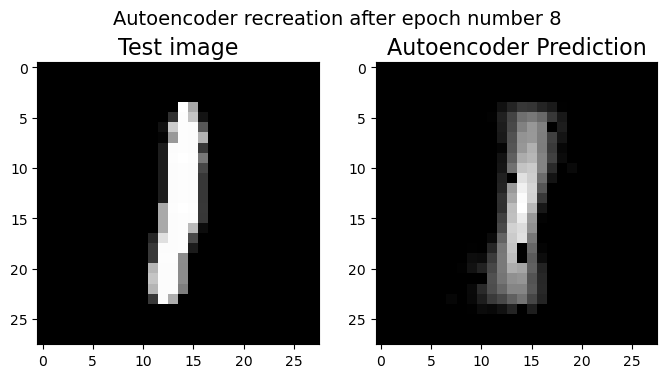

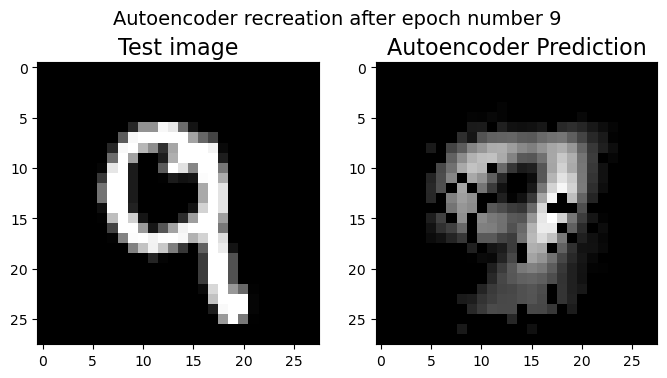

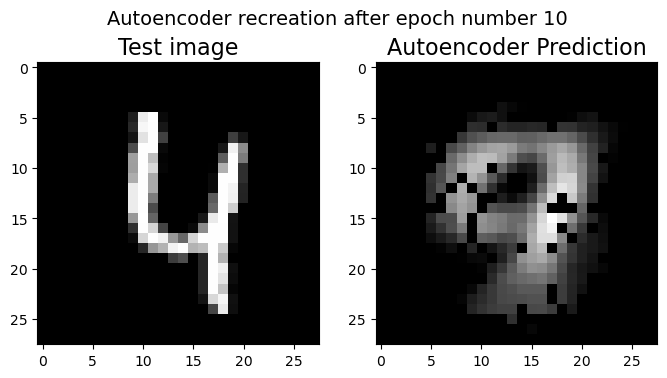

In [6]:
# # You can train for 10 or more epochs to see how well our autoencoder model performs
epochs = 10

for i in range(epochs+1):
# Note: epoch 0 is before any fitting
    fig, axs = plt.subplots(1, 2,figsize = (8,4))
    sample_x = x_test[np.random.choice(x_test.shape[0])]
    axs[0].imshow(sample_x,cmap = "gray")
    axs[0].set_title('Test image',fontsize = 16)
    axs[1].imshow(autoencoder.predict(sample_x.reshape(1,28,28))[0],cmap = "gray")
    axs[1].set_title('Autoencoder Prediction',fontsize = 16);
    fig.suptitle(f'Autoencoder recreation after epoch number {i}',fontsize =14)
    plt.show()
    
    # specify predictors and targets for train and validation and train for an epoch
    
    autoencoder.fit(x=x_train,
                y=x_train,
                validation_data=(x_test, x_test))

## Mindchow 🍲

Go back and change the `latent_space` dimension to a lower value like 2. Does your autoencoder's reconstructions become better or worse? Why?

In [7]:
### edTest(test_recons) ###

# Fill 'Worse' or 'Better'
answer = 'Worse'

*Your answer here*